--------------

# Statsmodels library

Now, Let’s go through some of the common functions used in this LVC implemented through the Statsmodels library

**Statistical functions**

The Stats model contains classes and functions for time series analysis. 
* Autoregressive models (AR), vector autoregressive models (VAR), and autoregressive moving average models (ARMA) are examples of basic models. 
* Markov switching dynamic regression and autoregression are examples of non-linear models. 
* It also includes time series descriptive statistics such as autocorrelation, partial autocorrelation function, and periodogram, as well as the theoretical properties of ARMA or related processes. 
* Methods to work with autoregressive and moving average lag-polynomials are also included.

Statsmodels can be installed more easily as a part of the cross-platform Anaconda distribution, which is designed for scientific computing and data analysis.

**Installation**

> pip install statsmodels

After the installation of the statsmodels library, restart the jupyter kernel once and import the library into the working environment.

To import a statsmodels library, run the following command in a Jupyter notebook.

> import statsmodels

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.arima.model import ARIMA

------------

# sm.tsa.datetools.dates_from_range
[Documentation](https://tedboy.github.io/statsmodels_doc/generated/statsmodels.tsa.base.datetools.dates_from_range.html#statsmodels-tsa-base-datetools-dates-from-range)

In [2]:
# Getting a list of years dates, taking the last day of year as reference, starting on start year and ending on end year.
sm.tsa.datetools.dates_from_range(start='1700', end='1705')

[datetime.datetime(1700, 12, 31, 0, 0),
 datetime.datetime(1701, 12, 31, 0, 0),
 datetime.datetime(1702, 12, 31, 0, 0),
 datetime.datetime(1703, 12, 31, 0, 0),
 datetime.datetime(1704, 12, 31, 0, 0),
 datetime.datetime(1705, 12, 31, 0, 0)]

In [3]:
# Getting a list of monthly dates, taking the last day of the month, starting on the first month of the start year. 
# The length of the list is length.
sm.tsa.datetools.dates_from_range(start='1960m1', length=12)

[datetime.datetime(1960, 1, 31, 0, 0),
 datetime.datetime(1960, 2, 29, 0, 0),
 datetime.datetime(1960, 3, 31, 0, 0),
 datetime.datetime(1960, 4, 30, 0, 0),
 datetime.datetime(1960, 5, 31, 0, 0),
 datetime.datetime(1960, 6, 30, 0, 0),
 datetime.datetime(1960, 7, 31, 0, 0),
 datetime.datetime(1960, 8, 31, 0, 0),
 datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 10, 31, 0, 0),
 datetime.datetime(1960, 11, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0)]

In [4]:
# Getting a list of monthly dates, taking the last day of the month, starting on the second month of the start year.
# The length of the list is length.
sm.tsa.datetools.dates_from_range(start='1960m2', length=12)

[datetime.datetime(1960, 2, 29, 0, 0),
 datetime.datetime(1960, 3, 31, 0, 0),
 datetime.datetime(1960, 4, 30, 0, 0),
 datetime.datetime(1960, 5, 31, 0, 0),
 datetime.datetime(1960, 6, 30, 0, 0),
 datetime.datetime(1960, 7, 31, 0, 0),
 datetime.datetime(1960, 8, 31, 0, 0),
 datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 10, 31, 0, 0),
 datetime.datetime(1960, 11, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0),
 datetime.datetime(1961, 1, 31, 0, 0)]

In [5]:
# Getting a list of monthly dates, taking the last day of the quarter, starting on the first quarter of the start year.
# The length of the list is length. Only years (none char), months (m char), and quarters (q char) are allowed.
sm.tsa.datetools.dates_from_range(start='1960q3', length=4)

[datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0),
 datetime.datetime(1961, 3, 31, 0, 0),
 datetime.datetime(1961, 6, 30, 0, 0)]

--------------

# statsmodels.graphics.tsaplots.plot_acf
[Documentation](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)

An **ACF** is used to indicate how similar a value is to the previous value within a given time series. (Or) it helps to measure the degree of similarity between a given time series and the lagged version of that time series observed at various intervals.

Parameters:
* x = array_like → Array of time-series
* lag= {int, array_like}, optional → An int or array of lag values, used on the horizontal axis. uses np.arange(lags) when lags is an int. If not provided, lags=np.arange(len(corr)) is used.

In [6]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


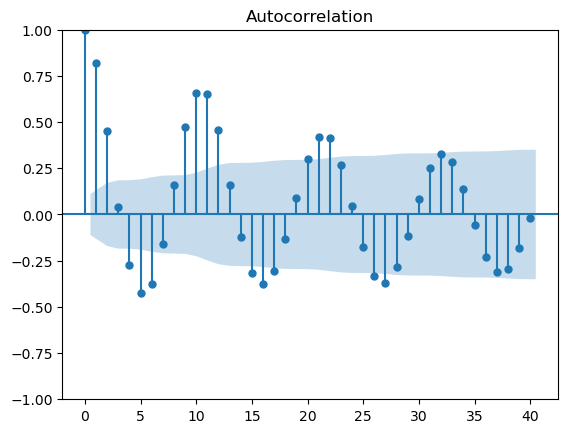

In [7]:
# sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
sm.graphics.tsa.plot_acf(dta.SUNACTIVITY.values, lags=40)
plt.show()

------------

# statsmodels.graphics.tsaplots.plot_pacf
[Documentation](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_pacf.html)

It always displays the sequence's correlation with itself with some number of time units per sequence order in which only the direct effect is displayed and all other intermediary effects are removed from the given time series.

Parameters:
* x=array_like → Array of time-series
* lag= {int, array_like}, optional

In [8]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

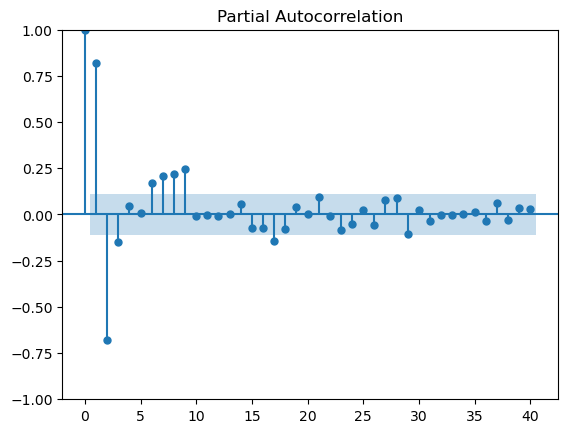

In [9]:
# sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, method="ywm")
sm.graphics.tsa.plot_pacf(dta.SUNACTIVITY.values, lags=40, method="ywm")
plt.show()

------------

# statsmodels.tsa.stattools.adfuller
[Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html)

The null and alternate hypothesis of this test are:

> * **Null Hypothesis ($H_o$)**: The series has a unit root (Non stationary).
> * **Alternate Hypothesis ($H_a$)**: The series has no unit root.

The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.

Parameters:
* x =array_like,1d → The data series to test.
* Maxlag: {None,int} → Maximum lag which is included in the test, default value 12*(nobs/100)^{¼ } is used when None

In [10]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

In [11]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [12]:
adf_test(dta.SUNACTIVITY)

Results of Dickey-Fuller Test:
Test Statistic                  -2.837781
p-value                          0.053076
#Lags Used                       8.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


**Based upon the significance level of 0.05 and the p-value of ADF test, the null hypothesis can not be rejected. Hence, the series is non-stationary.**

------------

# statsmodels.tsa.seasonal.seasonal_decompose
[Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)

* The additive model is useful when the seasonal variation is relatively constant over time.
* The multiplicative model is useful when the seasonal variation increases over time.

Decomposing the time-series components into a trend, seasonality, and residual.

Parameters:
* x: array_like, → Time series, Individual series are in columns if 2d. x must have two complete cycles.
* Period: int,optional → Period of the series.Must be used if x is not a Pandas object or if the index of x does not have a frequency. Overrides default periodicity of x if x is pandas object with a time series index.

In [13]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

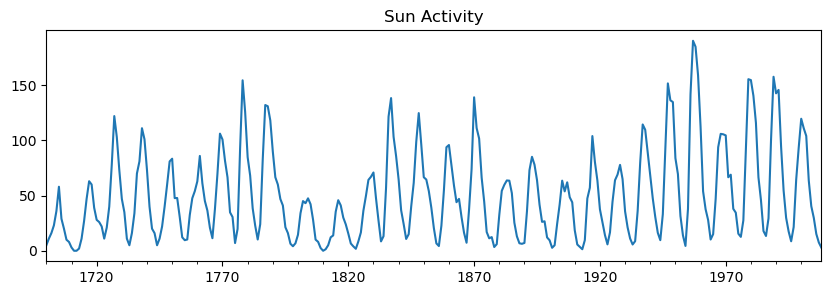

In [14]:
dta.SUNACTIVITY.plot(title="Sun Activity", figsize=(10,3))
plt.show()

In [15]:
seasonal_decomp = seasonal_decompose(dta.SUNACTIVITY, model="additive")

trend = seasonal_decomp.trend
seeasonal = seasonal_decomp.seasonal
residual = seasonal_decomp.resid
trend

1700-12-31     5.0
1701-12-31    11.0
1702-12-31    16.0
1703-12-31    23.0
1704-12-31    36.0
              ... 
2004-12-31    40.4
2005-12-31    29.8
2006-12-31    15.2
2007-12-31     7.5
2008-12-31     2.9
Name: trend, Length: 309, dtype: float64

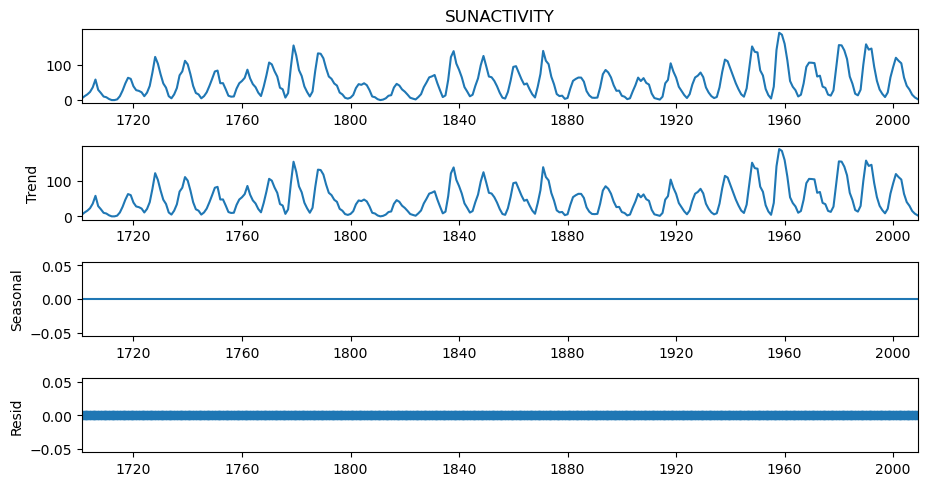

In [16]:
fig = seasonal_decomp.plot()
fig.set_size_inches((10, 5))
plt.show()

------------

# statsmodels.tsa.ar_model.AutoReg
[Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoReg.html)

The **Autoregressive model** is a type of random process. The model's output is linearly dependent on its own previous value, which is some number of lagged data points or past observations.

Parameters:
* endog: array_like → The dependent variable 
* lags: {None,int,list[int]} → The number of lags to include in the model is an integer or the list of lag indices to include. For example, [1, 4] will only include lags 1 and 4, while lags = 4 will include lags 1, 2, 3, and 4. None excludes all AR lags and behaves identically to 0.

In [17]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

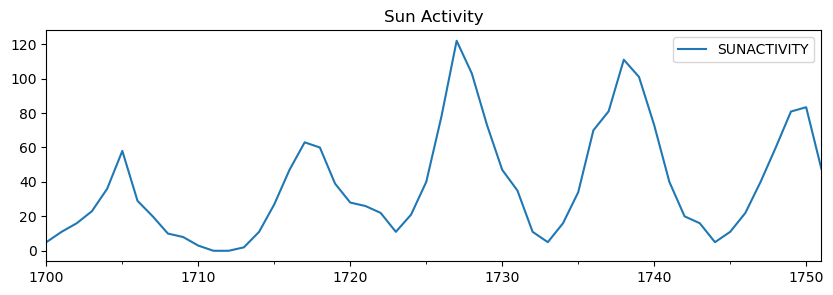

In [18]:
dta[dta.index.year < 1752].plot(title="Sun Activity", figsize=(10,3))
plt.show()

In [19]:
# Formatting the result of the model
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'

>* aic: Akaike Information Criterion using Lutkepohl’s definition.
>* bic: Bayes Information Criterion
>* hqic: Hannan-Quinn Information Criterion using Lutkepohl’s definition.

More details [here](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AutoRegResults.html#statsmodels.tsa.ar_model.AutoRegResults).

### Start by fitting an unrestricted Seasonal AR model

In [20]:
# lags parameter : The number of lags to include in the model if an integer or the list of lag indices to include. 
#                  For example, [1, 4] will only include lags 1 and 4 while lags=4 will include lags 1, 2, 3, and 4. 
#                  None excludes all AR lags, and behave identically to 0.
# trend parameter: The trend to include in the model:
#                  ‘n’ - No trend.
#                  ‘c’ - Constant only.
#                  ‘t’ - Time trend only.
#                  ‘ct’ - Constant and time trend.
# seasonalbool parameter:
#                  Flag indicating whether to include seasonal dummies in the model. 
#                  If seasonal is True and trend includes ‘c’, then the first period is excluded from the seasonal terms.
res = AutoReg(dta.SUNACTIVITY.values, lags = [1, 11, 12]).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: 2608.546, HQIC: 2615.940, BIC: 2627.015


**A lower AIC or BIC value indicates a better fit.**

### An alternative used seasonal dummies

In [21]:
res = AutoReg(dta.SUNACTIVITY.values, lags=1, seasonal=True, period=11).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: 2727.393, HQIC: 2746.782, BIC: 2775.885


### Finally, both the seasonal AR structure and dummies can be included

In [22]:
res = AutoReg(dta.SUNACTIVITY.values, lags=[1, 11, 12], seasonal=True, period=11).fit()
print(out.format(res.aic, res.hqic, res.bic))

AIC: 2590.408, HQIC: 2612.589, BIC: 2645.814


------------

# statsmodels.tsa.ar_model.ar_select_order
[Documentation](https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.ar_select_order.html?highlight=ar_select)

This functions predicts the best number of lags

In [23]:
# data = sm.datasets.sunspots.load_pandas().data['SUNACTIVITY']
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

###  Determine the optimal lag structure

In [24]:
# maxlagint parameter: The maximum lag to consider.
# globbool parameter : Flag indicating where to use a global search across all combinations of lags. 
#                      In practice, this option is not computational feasible when maxlag is larger 
#                      than 15 (or perhaps 20) since the global search requires fitting 
#                      2**maxlag models.
mod = ar_select_order(dta.SUNACTIVITY.values, maxlag=50)
mod.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Determine the optimal lag structure with seasonal terms

In [25]:
mod = ar_select_order(dta.SUNACTIVITY.values, maxlag=13, seasonal=True, period=12)
mod.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9]

### Globally determine the optimal lag structure

In [26]:
mod = ar_select_order(dta.SUNACTIVITY.values, maxlag=15, glob=True)
mod.ar_lags

[1, 2, 9]

------------

# statsmodels.tsa.arima.model.ARIMA
[Documentation](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)

An Auto regressive integrated moving average model is a generalization of a simple ARMA model. Both of these models are used to forecast or predict future time-series data points.

The ARIMA model is generally denoted as **ARIMA(p, d, q)** and the parameters p, d, q are defined as follows:
* p: the lag order or the number of time lag of autoregressive model AR(p)
* d: degree of differencing or the number of times the data have had subtracted with past value
* q: the order of moving average model MA(q)

> * autoregressive models: AR(p)
> * moving average models: MA(q)
> * mixed autoregressive moving average models: ARMA(p, q)
> * integration models: ARIMA(p, d, q)
> * regression with errors that follow one of the above ARIMA-type models

Parameters:
* endog: array_like, optional → The observed time-series process y
* Exong: array_like, optional → Array of exogenous regressors

In [27]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
dta.index.freq = dta.index.inferred_freq
del dta["YEAR"]

In [28]:
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()
print(arma_mod20.params)

print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

const      49.746198
ar.L1       1.390633
ar.L2      -0.688573
sigma2    274.727182
dtype: float64
2622.637093301343 2637.570458408934 2628.607481146589


In [29]:
arma_mod30 = ARIMA(dta, order=(3, 0, 0)).fit()
print(arma_mod30.params)

print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

const      49.751911
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64
2619.4036292456494 2638.0703356301383 2626.866614052207


------------